In [ ]:
import numpy as np
import matplotlib . pyplot as plt
from matplotlib import cm
!pip install qutip
from qutip import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.8/31.8 MB 46.7 MB/s eta 0:00:00


# Monte carlo and 3 harmonic oscillators


~ Calculating the evolution with the master equation ...



/usr/local/lib/python3.12/dist-packages/qutip/solver/solver_base.py:583: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(



~ Calculating the evolution with the monte carlo method ...

10.0%. Run time:   0.33s. Est. time left: 00:00:00:02
20.0%. Run time:   0.67s. Est. time left: 00:00:00:02
30.0%. Run time:   0.99s. Est. time left: 00:00:00:02
40.0%. Run time:   1.34s. Est. time left: 00:00:00:02
50.0%. Run time:   1.65s. Est. time left: 00:00:00:01
60.0%. Run time:   1.99s. Est. time left: 00:00:00:01
70.0%. Run time:   2.29s. Est. time left: 00:00:00:00
80.0%. Run time:   2.62s. Est. time left: 00:00:00:00
90.0%. Run time:   2.98s. Est. time left: 00:00:00:00
100.0%. Run time:   3.30s. Est. time left: 00:00:00:00
Total run time:   3.32s


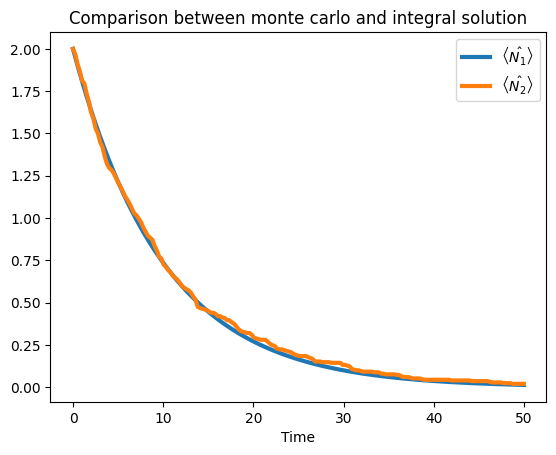

In [33]:
psi0 = basis(1000, 2)
a = tensor(destroy(1000))
H = a.dag() * a
times = np.linspace(0.0, 50.0, 200)

# master equation solver
print('\n~ Calculating the evolution with the master equation ...\n')
me_result = mesolve(H, psi0, times, [np.sqrt(0.1) * a], a.dag() * a,)

# monte carlo solver
print('\n~ Calculating the evolution with the monte carlo method ...\n')
mc_result = mcsolve(H, psi0, times, [np.sqrt(0.1) * a], a.dag() * a, ntraj=250)

timelist = [me_result.times, mc_result.times]
expectlist = [me_result.expect[0], mc_result.expect[0]]
label = [r'$\langle N \rangle$ (master equation)', r'$\langle N \rangle$ (monte carlo)']


fig, ax = plt.subplots()
ax.plot(timelist[0], expectlist[0], label=label[0], linewidth=3)
ax.plot(timelist[1], expectlist[1], label=label[1], linewidth=3)
ax.set_xlabel('Time')
ax.legend((r'$\left<\hat{N_1}\right>$', r'$\left<\hat{N_2}\right>$'))
plt.title('Comparison between monte carlo and integral solution')
plt.show()

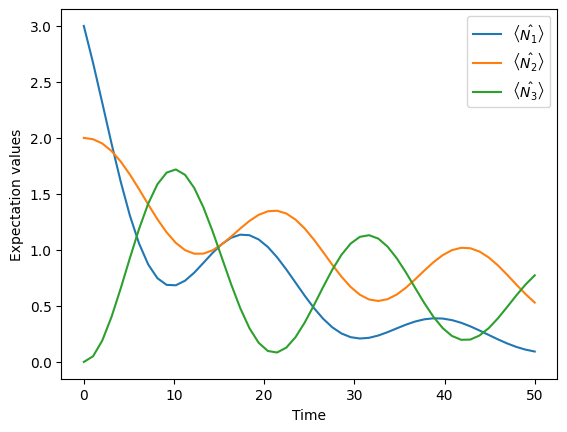

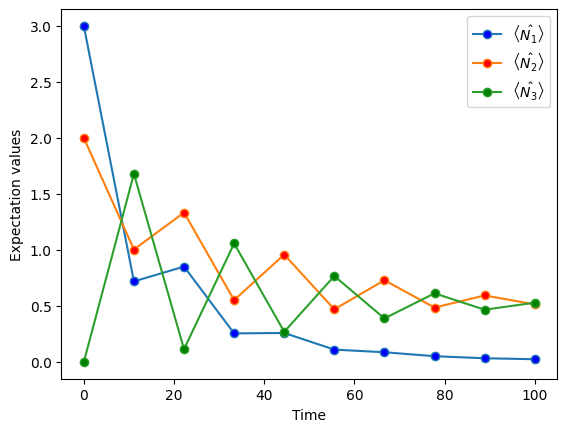

In [32]:
times = np.linspace(0.0, 50.0, 50)
psi0 = tensor(fock(10, 0), fock(10, 2), fock(10, 3))

a = tensor(qeye(10), qeye(10), destroy(10))
sm1 = tensor(qeye(10), destroy(10), qeye(10))
sm2 = tensor(destroy(10), qeye(10), qeye(10))
int_ops = a * sm1.dag() + a.dag() * sm2 + a * sm2.dag() + a.dag() * sm1 + sm1 * sm2.dag() + sm1.dag() * sm2

H = a.dag() * a + sm1.dag() * sm1 + sm2.dag() * sm2 + 0.1 * int_ops
result = mesolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2])

fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0])
ax.plot(result.times, result.expect[1])
ax.plot(result.times, result.expect[2])
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend((r'$\left<\hat{N_1}\right>$', r'$\left<\hat{N_2}\right>$', r'$\left<\hat{N_3}\right>$'))
plt.show()

times = np.linspace(0.0, 100.0, 10)
psi0 = tensor(fock(10, 0), fock(10, 2), fock(10, 3))

a = tensor(qeye(10), qeye(10), destroy(10))
sm1 = tensor(qeye(10), destroy(10), qeye(10))
sm2 = tensor(destroy(10), qeye(10), qeye(10))
int_ops = a * sm1.dag() + a.dag() * sm2 + a * sm2.dag() + a.dag() * sm1 + sm1 * sm2.dag() + sm1.dag() * sm2

H = a.dag() * a + sm1.dag() * sm1 + sm2.dag() * sm2 + 0.1 * int_ops
result = mesolve(H, psi0, times, [np.sqrt(0.1) * a], [a.dag() * a, sm1.dag() * sm1, sm2.dag() * sm2])

fig, ax = plt.subplots()
ax.plot(result.times, result.expect[0], marker='o', markerfacecolor='blue')
ax.plot(result.times, result.expect[1], marker='o', markerfacecolor='red')
ax.plot(result.times, result.expect[2], marker='o', markerfacecolor='green')
ax.set_xlabel('Time')
ax.set_ylabel('Expectation values')
ax.legend((r'$\left<\hat{N_1}\right>$', r'$\left<\hat{N_2}\right>$', r'$\left<\hat{N_3}\right>$'))
plt.show()